In [1]:
## example dataset (taiwan housing) to demonstrate clustering + geospatial viz techniques
## dataset url:
## https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [3]:
orig = pd.read_excel('../Datasets/taiwan_real_estate_valuation.xlsx')

print(orig.shape)
orig.head(2)

(414, 8)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2


In [4]:
orig.drop(columns=['No'], inplace=True)

orig.rename(columns={'X1 transaction date': 'transaction_date', 'X2 house age': 'house_age',
                    'X3 distance to the nearest MRT station': 'dist_to_station',
                    'X4 number of convenience stores': 'num_stores',
                    'X5 latitude': 'lat', 'X6 longitude': 'lon',
                    'Y house price of unit area': 'house_price'
                   }, inplace=True)

orig.head(2)

,transaction_date,house_age,dist_to_station,num_stores,lat,lon,house_price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2


In [5]:
orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
transaction_date    414 non-null float64
house_age           414 non-null float64
dist_to_station     414 non-null float64
num_stores          414 non-null int64
lat                 414 non-null float64
lon                 414 non-null float64
house_price         414 non-null float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [6]:
orig.describe()

,transaction_date,house_age,dist_to_station,num_stores,lat,lon,house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


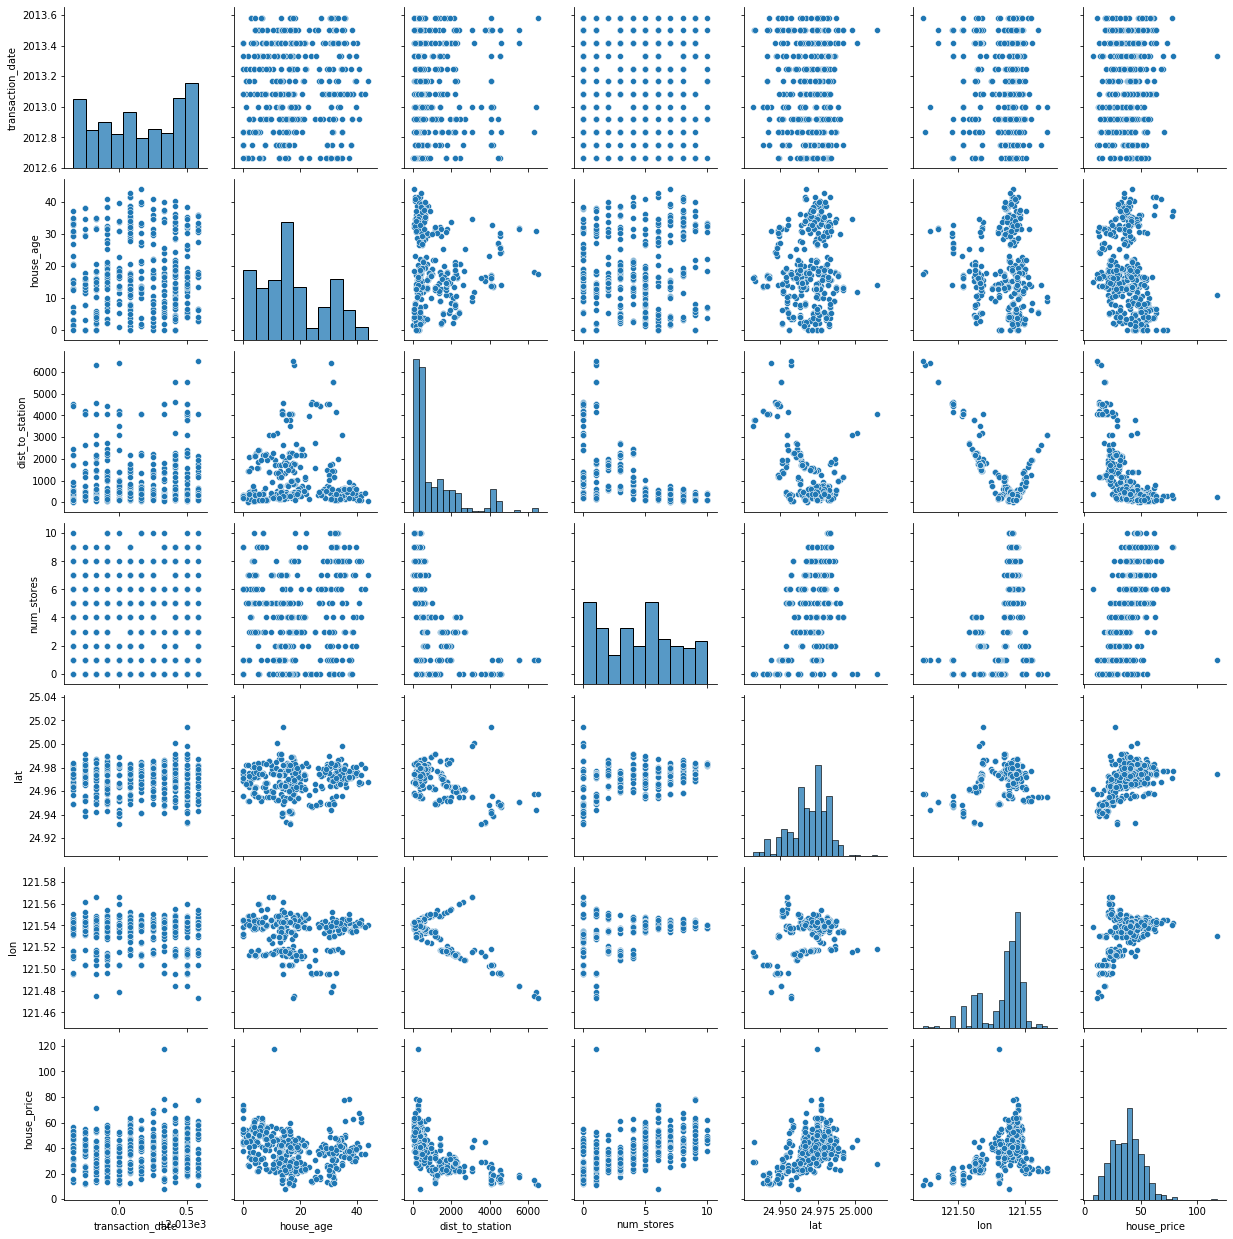

In [7]:
sns.pairplot(orig)

Mean house price: 37.98019323671498
Median house price: 38.45


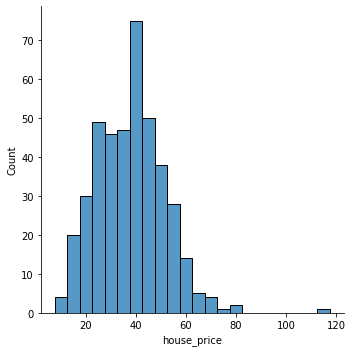

In [8]:
print(f'Mean house price: {orig.house_price.mean()}')
print(f'Median house price: {orig.house_price.median()}')

sns.displot(orig.house_price)

## Data Cleaning

In [9]:
df = orig.copy()

In [10]:
df['cat_price'] = np.where(df['house_price'] <= df.house_price.median(), 0, 1)

df.cat_price.value_counts()

1    207
0    207
Name: cat_price, dtype: int64

In [11]:
minlat = df[df.lat == min(df.lat)][['lat', 'lon']].values[0].ravel().tolist()
maxlat = df[df.lat == max(df.lat)][['lat', 'lon']].values[0].ravel().tolist()
minlon = df[df.lon == min(df.lon)][['lat', 'lon']].values[0].ravel().tolist()
maxlon = df[df.lon == max(df.lon)][['lat', 'lon']].values[0].ravel().tolist()

In [12]:
map_border = folium.Map(
    [df.lat.mean(), df.lon.mean()],
    zoom_start=12,
    tiles='Stamen Terrain'
    )

folium.Marker(minlat, popup='Minlat').add_to(map_border)
folium.Marker(maxlat, popup='Maxlat').add_to(map_border)
folium.Marker(minlon, popup='Minlon').add_to(map_border)
folium.Marker(maxlon, popup='Maxlon').add_to(map_border)

map_border

In [13]:
coords = list(zip(df.lat, df.lon))

coords[0]

(24.98298, 121.54024)

In [14]:
map_coord = folium.Map(
    [df.lat.mean(), df.lon.mean()],
    zoom_start=12,
    tiles='Stamen Terrain'
    )

for coord in coords:

    folium.Circle(
    radius=50,
    location=coord,
    color='crimson',
    fill=False,
    ).add_to(map_coord)
    
map_coord.add_child(folium.LatLngPopup())

map_coord

In [15]:
df[df.cat_price == 0].lat

0      24.98298
5      24.96305
8      24.95095
9      24.96731
13     24.96108
         ...   
402    24.97388
405    24.95663
407    24.95505
408    24.96330
409    24.94155
Name: lat, Length: 207, dtype: float64

In [16]:
coords_low = list(zip(df[df.cat_price == 0].lat, df[df.cat_price == 0].lon))
coords_high = list(zip(df[df.cat_price == 1].lat, df[df.cat_price == 1].lon))

In [17]:
map_coord = folium.Map(
    [df.lat.mean(), df.lon.mean()],
    zoom_start=12,
    tiles='Stamen Terrain'
    )

for coord in coords_low:

    folium.Circle(
    radius=50,
    location=coord,
    color='yellow',
    fill=False,
    ).add_to(map_coord)
    
for coord in coords_high:

    folium.Circle(
    radius=50,
    location=coord,
    color='crimson',
    fill=False,
    ).add_to(map_coord)
    
map_coord.add_child(folium.LatLngPopup())

map_coord

## Normalize data

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :4])

df_scaled[:5]

C:\Users\liamk\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.27272729, 0.73059361, 0.00951267, 1.        ],
       [0.27272729, 0.44520548, 0.04380939, 0.9       ],
       [1.        , 0.30365297, 0.08331505, 0.5       ],
       [0.90909094, 0.30365297, 0.08331505, 0.5       ],
       [0.18181812, 0.11415525, 0.05679909, 0.5       ]])

## K-Means

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=2, max_iter=2000, algorithm = 'auto')
kmeans.fit(df_scaled)

df['label_k_2'] = kmeans.labels_

df.head(2)

,transaction_date,house_age,dist_to_station,num_stores,lat,lon,house_price,cat_price,label_k_2
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,0,0
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,1,0


In [22]:
coords_k_0 = list(zip(df[df.label_k_2 == 0].lat, df[df.label_k_2 == 0].lon))
coords_k_1 = list(zip(df[df.label_k_2 == 1].lat, df[df.label_k_2 == 1].lon))

In [23]:
map_coord = folium.Map([df.lat.mean(), df.lon.mean()], zoom_start=12, tiles='Stamen Terrain')

for coord in coords_k_0:
    folium.Circle(radius=50,location=coord,color='yellow',fill=False).add_to(map_coord)
    
for coord in coords_k_1:
    folium.Circle(radius=50,location=coord,color='crimson',fill=False).add_to(map_coord)
    
map_coord.add_child(folium.LatLngPopup())

map_coord

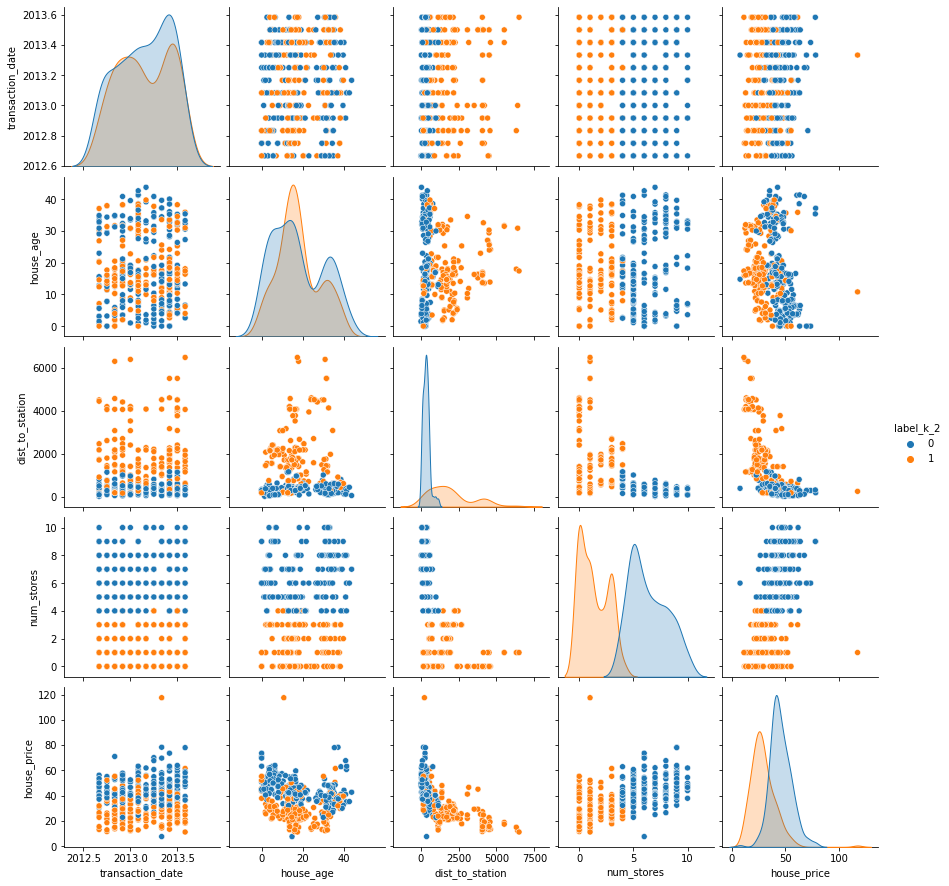

In [24]:
sns.pairplot(df[['transaction_date', 'house_age', 'dist_to_station', 'num_stores',
                 'house_price', 'label_k_2']], hue='label_k_2')

In [25]:
df.groupby(['label_k_2'])[['transaction_date', 'house_age', 'dist_to_station', 
                           'num_stores', 'house_price']].agg('median')

,transaction_date,house_age,dist_to_station,num_stores,house_price
label_k_2,,,,,
0,2013.166667,15.6,337.6016,6,44.0
1,2013.083333,16.3,1626.0830,1,27.3


In [26]:
## Findings:
## dist_to_station, num_stores and house_price are key features for differentiating the clusters.
## the clustering matching the lat/ lon distribution of house_price high/ low
## (even though it was passed as a feature for clustering), shows that there are
## material differences / correlations for the house groups

In [27]:
## Next steps:
## Look at K == 3? would be useful if there were more features